## 作业
1. 尝试在一张图中运用所讲过的功能，对`title,text,xlabel,ylabel,数学表达式,tick and ticklabel,legend`进行详细的设计

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


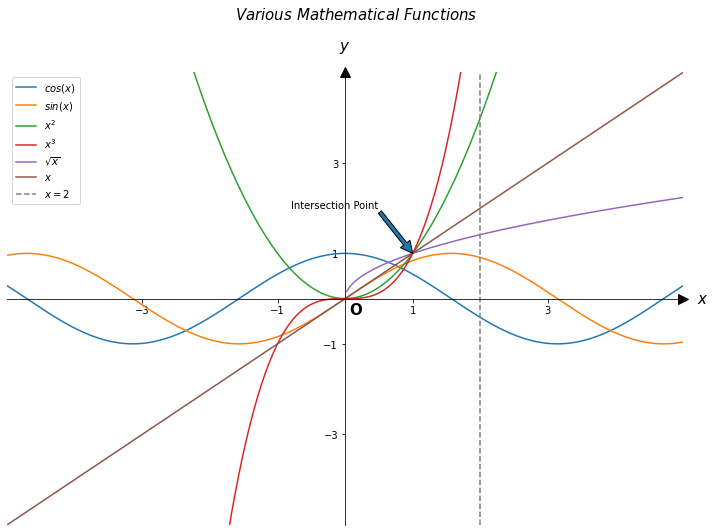

In [93]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import BlendedGenericTransform
x = np.linspace(-5, 5, 200)
ys = [np.cos(x), np.sin(x), x**2, x**3, x**0.5, x]
lds = ['$cos(x)$','$sin(x)$','$x^2$','$x^3$','$\sqrt{x}$ ','$x$']
fig, ax = plt.subplots(1, 1, figsize = (10, 7), tight_layout = True)

for i in range(len(ys)):
  ax.plot(x, ys[i], label = lds[i])

ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))
ax.set(xlim = (-5, 5), ylim = (-5, 5), 
       xticks = [i for i in range(-4, 5) if i % 2 != 0],
       yticks = [i for i in range(-4, 5) if i % 2 != 0])

ax.axvline(2,label = '$x = 2$', color = 'grey', 
           linestyle = '--')
ax.annotate(xy = (1, 1), s = 'Intersection Point', 
            xytext = (-0.8, 2),
            arrowprops = {})
# make arrows
ax.plot((1), (0), ls="", marker=">", ms=10, color="k", 
        transform=ax.get_yaxis_transform(), clip_on=False)
ax.plot((0), (1), ls="", marker="^", ms=10, color="k", 
        transform=ax.get_xaxis_transform(), clip_on=False)

# make origin point
ax.annotate(xy = (0, 0), s = '$\mathbf{O}$',
            xytext = (0.05, -0.35), fontsize = 15)

ax.text(0, 1.05, '$y$', 
        transform=BlendedGenericTransform(ax.transData, ax.transAxes), 
        ha='center',
        fontsize = 15)
ax.text(1.02, 0, '$x$', 
        transform=BlendedGenericTransform(ax.transAxes, ax.transData), 
        va='center',
        fontsize = 15)
ax.legend()
fig.suptitle('$Various\ Mathematical\ Functions$', y = 1.05, fontsize = 15)

plt.show()

2. 阅读你可能用到的文献或者相关书籍，思考自己如何才能通过学过的例子将自己认为比较好看的图给复现出来
  1. 复现前需要收集到最原始的数据
  2. 用一种最基本的方式将数据以可视化出来，例如，如果绘制的是一条Line2D曲线，则先将这条曲线以最普通的方式实现
  3. 调整细节，观察和目标图片不同的地方，分析每个部分用到的模块
  4. 不断修改，逼近我们希望复现的目标图片


以下面这张图为例
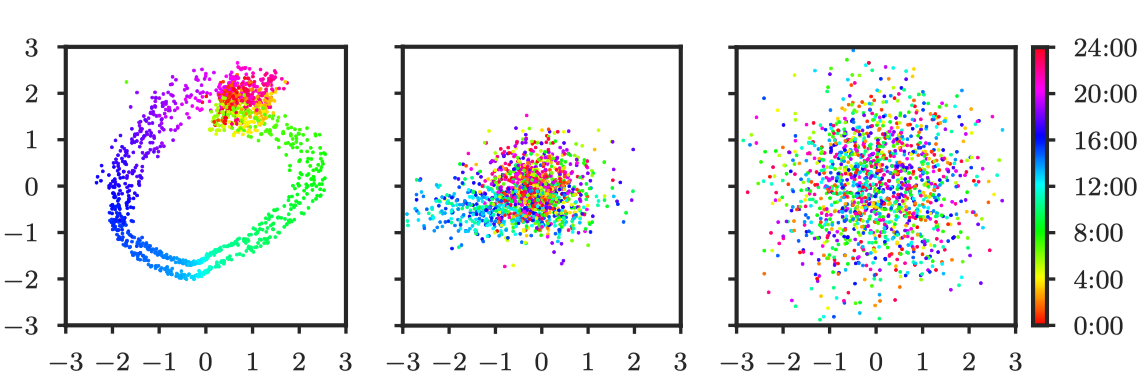



1. 首先我们需要获得这张图最原始的实验数据
2. 之后，我们分析这张图的排版，可以得到这是一个figure里面放置3个axes，即元素排布为`1 row 3 cols`的图片排版，共享横纵坐标轴，则我们可以设置`sharex = True, sharey = True`
3. 特征为散点图，则考虑使用`scatter()`相关的方法
4. 不同的散点有颜色渐变特征，则可以考虑使用matplotlib中自带的colormaps https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html
5. 修改Tick和Ticklabel，增加Legend

### 一、Figure和Axes上的文本
#### 1. text
- pyplot API - `matplotlib.pyplot.text(x, y, s, fontdict=None, **kwargs`)
- OO API - `Axes.text(self, x, y, s, fontdict=None, **kwargs)`

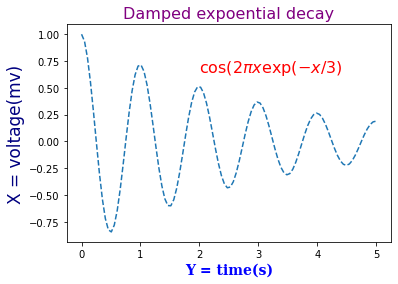

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
# 4 font styles
font1 = {'family': 'Times New Roman',
        'color':  'purple',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'Times New Roman',
        'color':  'red',
        'weight': 'normal',
        'size': 16,
        }
font3 = {'family': 'serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 14,
        }
font4 = {'family': 'DejaVu Sans',
        'color':  'navy',
        'weight': 'normal',
        'size': 17,
        }

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x/3) # cos(2\pi x)exp^{-x/3}
plt.plot(x, y, '--')
plt.title('Damped expoential decay', fontdict = font1)

plt.text(2, 0.65, r'$\cos(2 \pi x \exp(-x/3)$', fontdict = font2) # LaTex

plt.xlabel('Y = time(s)', fontdict = font3)
plt.ylabel('X = voltage(mv)', fontdict = font4)

plt.subplots_adjust(left = 0.15)
plt.show()

#### 2. title & set_title
- pyplot API : `matplotlib.pyplot.title(label, fontdict = None, loc = None, pad = None, *, y = None, **kwargs)`
- OO API : `Axes.set_title(self, label, fontdict = None, loc = None, pad = None, *, y = None, **kwargs`)

#### 3. figtext & text
- pyplot API : `matplotlib.pyplot.figtext(x, y, s, fontdict = None, ** kwargs)`
- OO API : 'text(self, x, y, s, fontdict = None, **kwargs)`

#### 4. suptitle
- pyplot API : `matplotlib.pyplot.suptitle(t, **kwargs)`
- OO API : `suptitle(self, t, **kwargs)`

#### 5. xlabel & ylabel
- pyplot API : `matplotlib.pyplot.xlabel(xlabel, fontdict = None, labelpad = None, *, loc = None, **kwargs)`
`matplotlib.pyplot.ylabel(ylabel, fontdict = None, labelpad = None, *, loc = None, **kwargs)`
- OO API : `Axes.set_xlabel(self, xlabel, fontdict = None, labelpad = None, *, loc = None, **kwargs)`
`Axes.set_ylabel(self, ylabel, fontdict = None, labelpad = None, *, loc = None, **kwargs)`


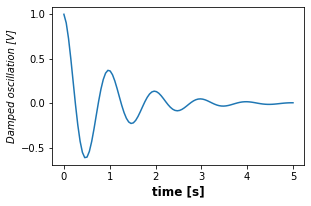

In [ ]:
from matplotlib.font_manager import FontProperties
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x) # cos(2\pi x)e^{-x}

font = FontProperties()
font.set_family('serif') # {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'}
font.set_name('DejaVu Sans')
font.set_style('italic')

fig, ax = plt.subplots(figsize = (5, 3))
fig.subplots_adjust(bottom = 0.15, left = 0.2)
ax.plot(x, y)
ax.set_xlabel('time [s]', fontsize = 'large', fontweight = 'bold')
ax.set_ylabel('Damped oscillation [V]', fontproperties = font)

plt.show()

#### 6. annotate
- pyplot API : `matplotlib.pyplot.annotate(text, xy, *args, **kwargs)`
- OO API : `Axes.annoate(self, text, xy, *args, **kwargs)`

> Annotate - The text can be displayed in another position xytext. An arrow pointing from the text to the annotated point xy can then be added by defining arrowprops.

> FancyArrowPatch - A fancy arrow patch. It draws an arrow using the ArrowStyle.
The head and tail positions are fixed at the specified start and end points of the arrow, but the size and shape (in display coordinates) of the arrow does not change when the axis is moved or zoomed.

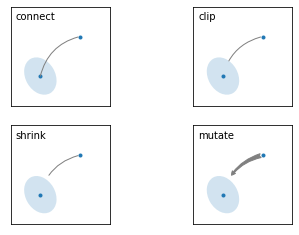

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, axs = plt.subplots(2, 2)
x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

'''
print(typea(axs)) => <class 'numpy.ndarray'>
Here, axs is a numpy array of axes
axs.flat is not a function, it's an attribute of the numpy.ndarray.flat
'''
ax = axs.flat[0]
ax.plot((x1, x2), (y1, y2), ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle = 30, alpha = 0.2)
ax.add_artist(el) # Create a artist in axes
'''
'data' - 	Use the coordinate system of the object being annotated (default)
'''
ax.annotate("",
            xy = (x1, y1), xycoords = 'data',
            xytext = (x2, y2), textcoords = 'data',
            arrowprops = dict(arrowstyle = "-",
                              color = "0.5",
                              patchB = None,
                              shrinkB = 0,
                              connectionstyle = "arc3, rad = 0.3",),
            )

'''
  After the data coordinate system, axes is probably the second 
most useful coordinate system. 
  Here the point (0,0) is the bottom left of your axes or subplot, 
(0.5, 0.5) is the center, and (1.0, 1.0) is the top right.

  The difference between data coordinate system and the axes coordinate system is
  'data' 	Use the coordinate system of the object being annotated
  'ax.transAxes' => point(0.0 ,0.0) is the bottom left and (1.0, 1.0) is the top right
'''

ax.text(.05, 0.95, "connect", transform = ax.transAxes, ha = "left", va = "top")

'''
aspect - Set the aspect of the axis scaling, i.e. the ratio of y-unit to x-unit.
aspect=1 is the same as aspect='equal'. => y / x = 1
'''

ax = axs.flat[1]
ax.plot((x1, x2), (y1, y2), ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle = 30, alpha = 0.2)
ax.add_artist(el) # Create a artist in axes

'''
patchB = el
'''
ax.annotate("",
            xy = (x1, y1), xycoords = 'data',
            xytext = (x2, y2), textcoords = 'data',
            arrowprops = dict(arrowstyle = "-",
                              color = "0.5",
                              patchB = el,
                              shrinkB = 0,
                              connectionstyle = "arc3, rad = 0.3",),
            )

ax.text(.05, 0.95, "clip", transform = ax.transAxes, ha = "left", va = "top")

ax = axs.flat[2]
ax.plot((x1, x2), (y1, y2), ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle = 30, alpha = 0.2)
ax.add_artist(el) # Create a artist in axes

'''
ShrinkB : Shrinking factor of the tail and head of the arrow respectively.
'''
ax.annotate("",
            xy = (x1, y1), xycoords = 'data',
            xytext = (x2, y2), textcoords = 'data',
            arrowprops = dict(arrowstyle = "-",
                              color = "0.5",
                              patchB = el,
                              shrinkB = 5, 
                              connectionstyle = "arc3, rad = 0.3",),
            )

ax.text(.05, 0.95, "shrink", transform = ax.transAxes, ha = "left", va = "top")

ax = axs.flat[3]
ax.plot((x1, x2), (y1, y2), ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle = 30, alpha = 0.2)
ax.add_artist(el) # Create a artist in axes

'''
arrowstyle = "fancy"
'''
ax.annotate("",
            xy = (x1, y1), xycoords = 'data',
            xytext = (x2, y2), textcoords = 'data',
            arrowprops = dict(arrowstyle = "fancy",
                              color = "0.5",
                              patchB = el,
                              shrinkB = 5, 
                              connectionstyle = "arc3, rad = 0.3",),
            )

ax.text(.05, 0.95, "mutate", transform = ax.transAxes, ha = "left", va = "top")

for ax in axs.flat:
  ax.set(xlim = (0, 1), ylim = (0, 1), xticks = [], yticks = [], aspect = 1)

plt.show()

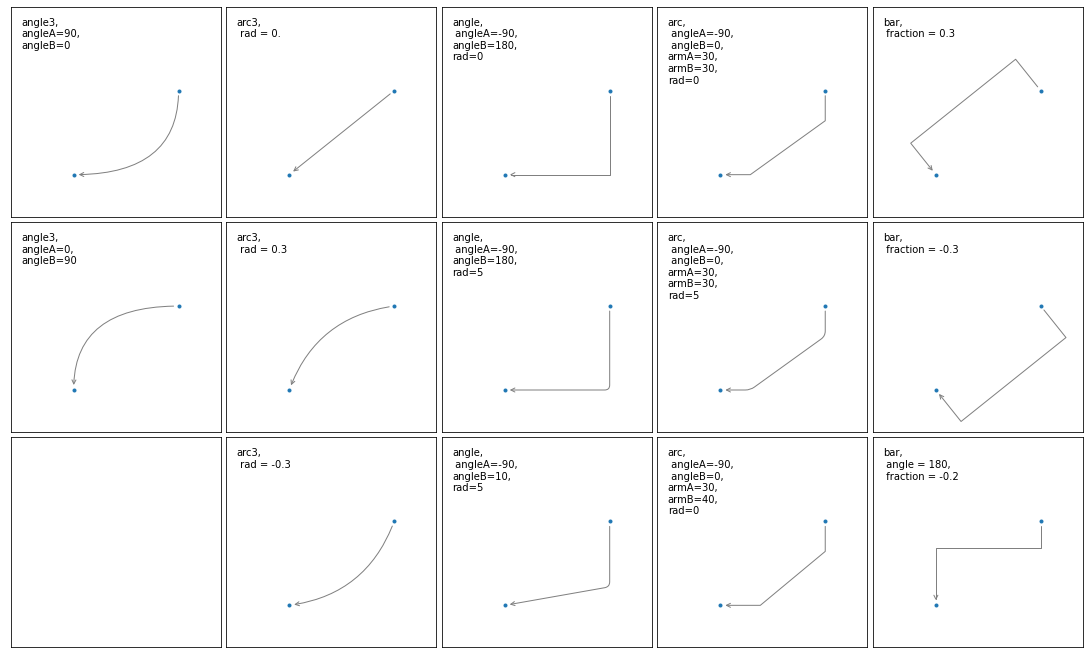

In [ ]:
'''
Various Connection Style
'''
import matplotlib.pyplot as plt
def demo_con_style(ax, connectionstyle):
  x1, y1 = 0.3, 0.2
  x2, y2 = 0.8, 0.6

  ax.plot((x1, x2), (y1, y2), ".")
  ax.annotate("",
              xy = (x1, y1), xycoords = 'data',
              xytext = (x2, y2), textcoords = 'data',
              arrowprops = dict(arrowstyle = "->", color = "0.5",
                                shrinkA = 5, shrinkB = 5,
                                patchA = None, patchB = None,
                                connectionstyle = connectionstyle,),
              )
  
  ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
          transform = ax.transAxes, ha = "left", va = "top")
  
fig, axs = plt.subplots(3, 5, figsize= (15, 9))
demo_con_style(axs[0, 0], "angle3,angleA=90,angleB=0")
demo_con_style(axs[1, 0], "angle3,angleA=0,angleB=90")

demo_con_style(axs[0, 1], "arc3, rad = 0.")
demo_con_style(axs[1, 1], "arc3, rad = 0.3")
demo_con_style(axs[2, 1], "arc3, rad = -0.3")

demo_con_style(axs[0, 2], "angle, angleA=-90,angleB=180,rad=0")
demo_con_style(axs[1, 2], "angle, angleA=-90,angleB=180,rad=5")
demo_con_style(axs[2, 2], "angle, angleA=-90,angleB=10,rad=5")

demo_con_style(axs[0, 3], "arc, angleA=-90, angleB=0,armA=30,armB=30,rad=0")
demo_con_style(axs[1, 3], "arc, angleA=-90, angleB=0,armA=30,armB=30,rad=5")
demo_con_style(axs[2, 3], "arc, angleA=-90, angleB=0,armA=30,armB=40,rad=0")

demo_con_style(axs[0, 4], "bar, fraction = 0.3")
demo_con_style(axs[1, 4], "bar, fraction = -0.3")
demo_con_style(axs[2, 4], "bar, angle = 180, fraction = -0.2")

'''
Not show tick => xticks = [], yticks = []
'''
for ax in axs.flat:
  ax.set(xlim=(0,1), ylim=(0,1), xticks = [], yticks = [], aspect = 1)
fig.tight_layout(pad = 0.2)

plt.show()

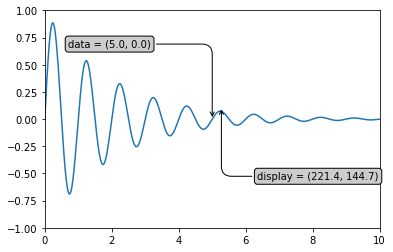

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Draw a curve line with steps = 0.005
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2 * np.pi * x)

fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10) # range of x axis
ax.set_ylim(-1, 1) # range of y axis

# Axis coordinates and pixels of the Annotated Point
xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))
'''
ax.transData.transform_point()
  Convert the point coordinates (5, 0) to the pixels (221.4, 144.72) 
in the subplots
  (5, 0) => (221.4, 144.72)
  data   => pixel
'''
# print(xdata,ydata,xdisplay,ydisplay)
bbox = dict(boxstyle = "round", fc = "0.8") # text boxes
# arrow properties
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle, angleA = 0, angleB = 90, rad = 10"
)

offset = 72
ax.annotate('data = (%.1f, %.1f)' %(xdata, ydata), 
            (xdata, ydata), # Annotate point (5, 0)
            xytext = (-2*offset, offset), # the text position in axes (-144, 72) relative to the annotated point           
            textcoords = 'offset points', # Offset relative to the annotated point (UNIT : point)
            bbox = bbox, arrowprops = arrowprops)

disp = ax.annotate('display = (%.1f, %.1f)' %(xdisplay, ydisplay),
                   (xdisplay, ydisplay), 
                   xytext = (0.5*offset, -offset), # the text position in axes (36, -72) relative to the annotated point
                   xycoords = 'figure pixels', # Points from the lower left of the figure (UNIT : point)
                   textcoords = 'offset points',
                   bbox = bbox, arrowprops = arrowprops)

plt.show()

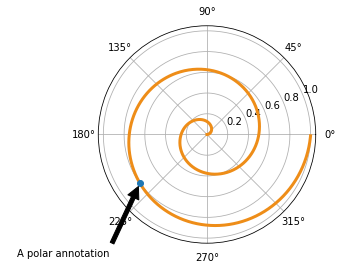

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# A polar coordinate with a Spiral Curve with a step of 0.001
fig = plt.figure()
ax = fig.add_subplot(111, polar = True) # 1 row, 1 col ,first plot
r = np.arange(0, 1, 0.001)
theta = 2 * 2 * np.pi * r
line, = ax.plot(theta, r, color = '#ee8d18', lw = 3)

# Draw a dot at the index of 800, and annotate it.
# Draw a dot
idx = 800
_r, _theta = r[idx], theta[idx]
ax.plot([_theta], [_r], 'o')
# Annotate
ax.annotate('A polar annotation', 
            xy = (_theta, _r), # xy in polar coordinate => (theta, radius)
            xytext = (0.05, 0.05), # The comment is placed at 0.05% of the ax(drawing area)
            textcoords = 'figure fraction', # 	Fraction of figure from lower left, A parameter of annoate
            arrowprops = dict(facecolor='black', shrink=0.05), 
            horizontalalignment='left',
            verticalalignment = 'bottom',
            )

plt.show()

#### 7. Font Properties
- Global Font Settings
- Local Font Settings


In [ ]:
# List all availabel fonts in matplotlib
from matplotlib import font_manager
font_family = font_manager.fontManager.ttflist
font_name_list = [i.name for i in font_family]
for font in font_name_list:
    print(f'{font}\n')

cmss10

DejaVu Serif

cmsy10

STIXSizeThreeSym

STIXSizeOneSym

DejaVu Sans Mono

STIXSizeFourSym

cmb10

STIXGeneral

DejaVu Sans

STIXSizeTwoSym

DejaVu Sans

cmtt10

cmr10

DejaVu Sans Mono

DejaVu Sans

DejaVu Sans

DejaVu Sans Mono

DejaVu Sans Mono

STIXGeneral

STIXSizeOneSym

DejaVu Serif

STIXSizeTwoSym

STIXSizeThreeSym

STIXGeneral

DejaVu Serif Display

DejaVu Serif

STIXSizeFourSym

STIXGeneral

DejaVu Sans Display

cmex10

STIXSizeFiveSym

STIXNonUnicode

cmmi10

STIXNonUnicode

STIXNonUnicode

STIXNonUnicode

DejaVu Serif

Liberation Mono

Liberation Sans

Liberation Mono

Liberation Serif

Liberation Sans Narrow

Liberation Serif

Liberation Serif

Liberation Mono

Liberation Sans

Liberation Mono

Liberation Sans

Liberation Sans Narrow

Humor Sans

Liberation Sans

Liberation Sans Narrow

Liberation Serif

Liberation Sans Narrow



In [ ]:
# Global Font Settings
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun'] # Specify the default font as New SongTi
plt.rcParams['axes.unicode_minus'] = False
# Solve the problem that the minus sign '-' is displayed as a square or an
# error is reported when saving images

findfont: Font family ['Monaco'] not found. Falling back to DejaVu Sans.


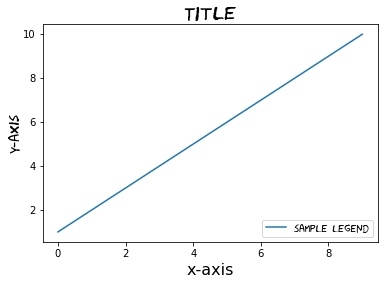

In [ ]:
# Local Font Settings 1
'''
fontproperties = ...
'''
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label = 'sample legend')

plt.xlabel('x-axis', fontproperties = 'Humor Sans', fontsize = 16)
plt.ylabel('y-axis', fontproperties = 'Humor Sans', fontsize = 14)
plt.title('Title', fontproperties = 'Humor Sans', fontsize = 20)
plt.legend(loc = 'lower right', prop = {"family" : "Humor Sans"}, fontsize = 8)

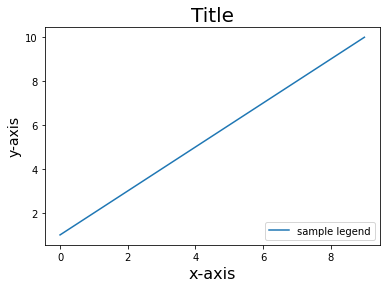

In [ ]:
# Local Font Settings 2
'''
load font from font file (.ttf)
'''
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label = 'sample legend')

myfont = fontmg.FontProperties(fname = r'/usr/share/fonts/truetype/monaco.ttf')
plt.xlabel('x-axis', fontproperties = myfont, fontsize = 16)
plt.ylabel('y-axis', fontproperties = myfont, fontsize = 14)
plt.title('Title', fontproperties = myfont, fontsize = 20)
plt.legend(loc = 'lower right', prop = {"family" : myfont}, fontsize = 8)

#### 8. 数学表达式

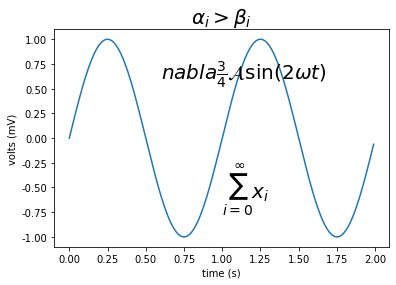

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2 * np.pi * t)

plt.plot(t, s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$nabla \frac{3}{4} \mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

### Summary

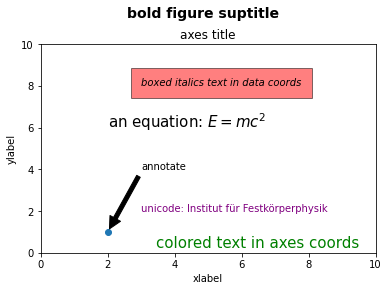

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111) # 1 row, 1 col ,first plot
fig.subplots_adjust(top = 0.85)

# Set title for the figure and the subplot respectively
fig.suptitle('bold figure suptitle', fontsize = 14, fontweight = 'bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# Set both x- and y-axis limits to [0, 10] instead of default [0, 1]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style = 'italic',
        bbox = {'facecolor' : 'red', 'alpha' : 0.5, 'pad' : 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize = 15)
font1 = {'family': 'DejaVu Sans',
         'color': 'purple',
         'weight': 'normal',
         'size' : 10}
ax.text(3, 2, 'unicode: Institut für Festkörperphysik', fontdict = font1)
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment = 'bottom', horizontalalignment = 'right',
        transform = ax.transAxes,
        color = 'green', fontsize = 15)

ax.plot([2], [1], 'o') # Single point
ax.annotate('annotate', xy = (2, 1), xytext = (3, 4),
            arrowprops = dict(facecolor = 'black', shrink = 0.05))

plt.show()

### 二、 Tick上的文本
主要内容：以下两者的灵活设置方式
- `tick`（刻度）
- `ticklabel`（刻度标签）

#### 1. 简单模式
- `tick` -> `set_ticks()`
- `ticklabel` -> `set_ticklabels()` 

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

x = np.linspace(0.0, 5.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

[ 0.  2.  4.  6.  8. 10.]


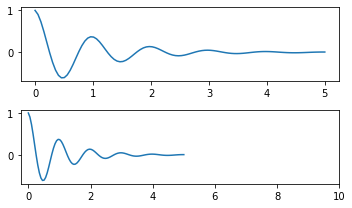

In [ ]:
'''
mannualy set_ticks()
- Not recommended unless you are sure that your tick range is very appropriate
'''
fig, axs = plt.subplots(2, 1, figsize = (5, 3), tight_layout = True) # 2 row 1 col
axs[0].plot(x, y)
axs[1].plot(x, y)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.))
# The range of the value is [0,5]
# The customized tick range is set too large
plt.show()

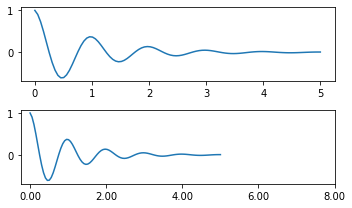

In [ ]:
'''
mannualy set_ticklabels()
- Not recommended unless you are sure that your tick range is very appropriate
'''
fig, axs = plt.subplots(2, 1, figsize = (5, 3), tight_layout = True) # 2 rows 1 col
axs[0].plot(x, y)
axs[1].plot(x, y)
ticks = np.arange(0., 8.1, 2.)
tick_label = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tick_label)
plt.show()

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.


<a list of 14 Line2D ticklines objects>


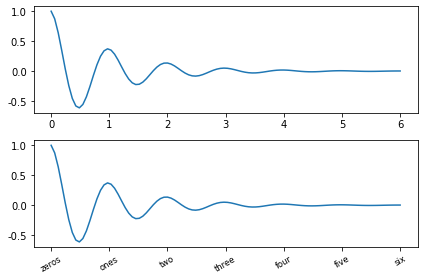

In [ ]:
'''
Automatically 
- In the following case, the setting of set_xtick() in axs[1] should correspond
to the data range, and then set_xticklabels() is used to set the label
corresponding to the scale
'''

import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize = (6, 4), tight_layout = True)
x = np.linspace(0.0, 6.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

axs[0].plot(x, y)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x, y)
axs[1].set_xticks([0,1,2,3,4,5,6])
axs[1].set_xticklabels(['zeros','ones','two','three','four','five','six'],
                       rotation = 30, fontsize = 'small')
axs[1].xaxis.set_ticks_position('bottom')
print(axs[1].xaxis.get_ticklines())
plt.show()

#### 2. Tick Locators and Formatters
除了使用上述的简单模式意外，这里我们可以使用`Tick Locators`和`Formatters`完成对于刻度位置和刻度标签的设置
标签位置：`Axis.set_major_locator()`和`Axis.set_minor_locator()`
标签格式：`Axis.set_major_formatter()`和`Axis.set_minor_formatter()`

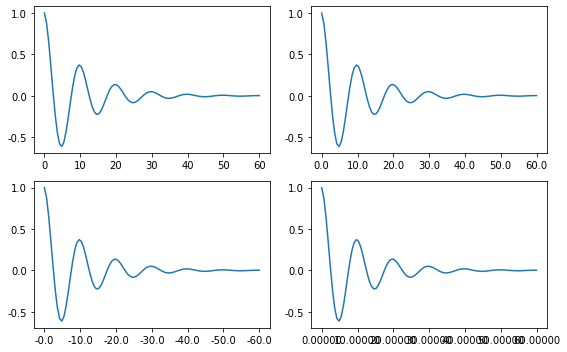

In [ ]:
'''
Tick Formatters - String
'''

x = np.linspace(0.0, 6.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

fig, axs = plt.subplots(2, 2, figsize = (8, 5), tight_layout = True)
# 2 rows 2 cols first plot
for n, ax in enumerate(axs.flat):
  ax.plot(x*10, y)

formatter = matplotlib.ticker.FormatStrFormatter("%1.1f")
axs[0,1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter("-%1.1f")
axs[1,0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter("%1.5f")
axs[1,1].xaxis.set_major_formatter(formatter)

plt.show()

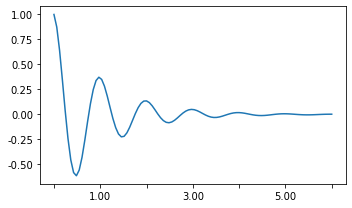

In [ ]:
'''
Tick Formatters - Function
'''
import matplotlib.ticker as tick
def formatoddticks(x, pos):
  if x % 2:
    return f'{x:1.2f}'
  else:
    return ''
x = np.linspace(0.0, 6.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)

fig, ax = plt.subplots(figsize = (5, 3), tight_layout = True)
ax.plot(x, y)
ax.xaxis.set_major_formatter(tick.FuncFormatter(formatoddticks)) # Function
plt.show()

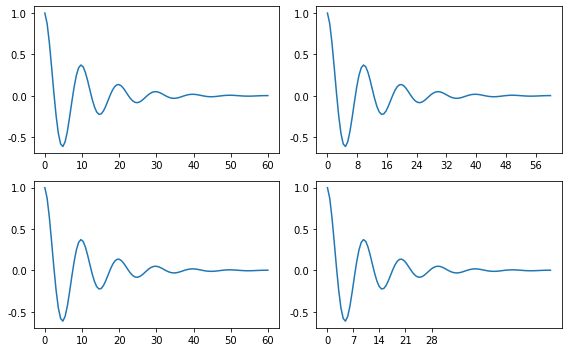

In [ ]:
'''
Tick Locaters => Built-in Locaters https://matplotlib.org/api/ticker_api.html
'''
import matplotlib.ticker as tick
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True) # 2 rows, 2 cols
x = np.linspace(0.0, 6.0, 100)
y = np.cos(2 * np.pi * x) * np.exp(-x)
for n, ax in enumerate(axs.flat):
    ax.plot(x*10, y)

locator = tick.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = tick.MaxNLocator(nbins = 10)
axs[0, 1].xaxis.set_major_locator(locator)

locator = tick.FixedLocator([0, 7, 14, 21, 28])
axs[1, 1].xaxis.set_major_locator(locator)

plt.show()

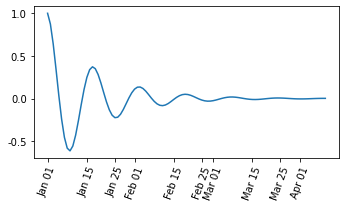

In [ ]:
'''
Tick Locaters => DayLocator / DateFormatter
'''
import matplotlib.dates as mdates
import datetime

locator = mdates.DayLocator(bymonthday=[1, 15, 25])
formatter = mdates.DateFormatter("%b %d")

fig, ax = plt.subplots(figsize = (5, 3), tight_layout = True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
# year, month, day, hour, minute, second, microsecond, tzinfo
# tzinfo = timezone information
'''
timedelta(days = 0, seconds = 0, microseconds = 0, milliseconds = 0,
          minutes = 0, hours = 0, weeks = 0)
'''
time = [base + datetime.timedelta(days = i) for i in range(len(x))]
ax.plot(time, y)
ax.tick_params(axis = 'x', rotation = 70)
plt.show()

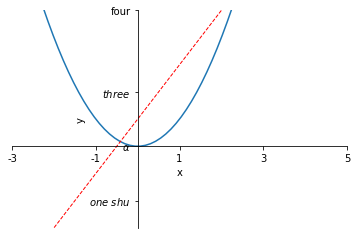

In [ ]:
'''
How to move the axis
And how to change the style of the scale value
'''
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3, 3, 50)
y1 = 2*x + 1
y2 = x**2
plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth = 1.0, linestyle = '--')
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.xlabel('x')
plt.ylabel('y')
new_ticks1 = np.linspace(-3,5,5)
plt.xticks(new_ticks1)
plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])

ax = plt.gca() # gca = get current axes
# gca = get current axes
# gcf = get current figure

'''
An axis spine -- the line noting the [ data area ] boundaries.
  In this case, you can get the current top and right axis through the 
ax.spines method and set their color to invisible.
  Then, reset the position of the left axis and the bottom axis
'''
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data', 0))
ax.spines['bottom'].set_position(('data', 0))
ax.xaxis.set_ticks_position('bottom')  
ax.yaxis.set_ticks_position('left')  
plt.show()

### 三、Legend 图例
- legend entry (图例条目），legend由一个或者多个legend entries组成，一个legend entry由（一个key，一个label）组成
  - legend key（图例键），每个legend label左边的colored/patterned marker（彩色/图案标记）
  - legend label（图例标签），描述由key来表示的handle的文本
- legend handle（图例句柄），用于在图例中生成适当图例条目的原始对象

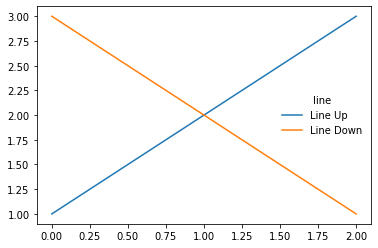

In [ ]:
line_up, = plt.plot([1, 2, 3], label = "Line 2") # X:[0, 1, 2] => Y:[1, 2, 3]
line_down, = plt.plot([3, 2, 1], label = "Line 1") # X:[0, 1, 2] => Y:[1, 2, 3]
plt.legend([line_up, line_down], ['Line Up', 'Line Down'], 
           loc = 5 , 
           title = 'line',
           frameon = False)

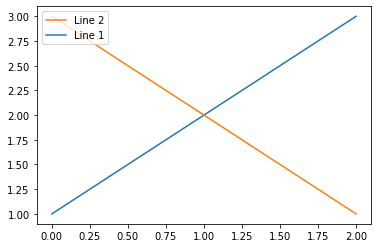

In [ ]:
'''
Multiple Legend
'''
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(-1, 1, 4) # Draw samples from a uniorm distribution
y = np.random.uniform(-1, 1, 4)
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
l1 = plt.legend([p2, p1], ["Line 2", "Line 1"], loc = 'upper left')

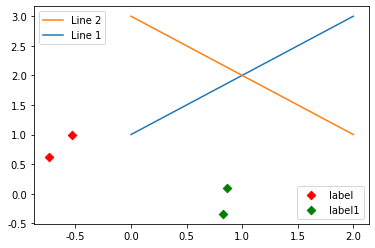

In [ ]:
'''
Multiple Legend
'''
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(-1, 1, 4) # Draw samples from a uniorm distribution
y = np.random.uniform(-1, 1, 4)
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
l1 = plt.legend([p2, p1], ["Line 2", "Line 1"], loc = 'upper left')

p3 = plt.scatter(x[0:2], y[0:2], marker = 'D', color = 'r')
p4 = plt.scatter(x[2:], y[2:], marker = 'D', color = 'g')
'''
The following code adds a new legend , which will remove legend l1 from the legend
'''
plt.legend([p3, p4], ['label', 'label1'], loc = 'lower right', scatterpoints = 1)
# scatterpoints = 3
# The number of marker points in the legend when creating a legend entry for a PathCollection (scatter plot). 
'''
  In order to remain the previous l1 legend, it's necessary to obtain the
current axes through plt.gca() function, and then use l1 as a separate artist.
'''
plt.gca().add_artist(l1)